# Algorithm: K-Means Clustering
## Language: Julia
## Author: Daisy Nsibu


![](https://i.stack.imgur.com/cIDB3.png)

# 1. Introduction

### What is K-Means Clustering?
Suppose that we have two-dimensional feature vectors and we dont know the labels, but we want to group these data points into groups with similar subgroups with similar feaatures. For example, If we have unclustered data the way to determine how many groups there are is with what's called **clustering**.
The most famous of these algorithms is the *K-means clustering algorithm*.

So this is a *unsupervised learning algorithm, meaning that our input is a collection of feature vectors with no corresponding  labels*

**Input: $X = x^{1},\dotsb, x^{N}$ unlabeld feature vectors**

**Goal: To group the vectors in *x* according to similar features.**

**Initialize: $C = C^{1}, \dotsb, C^{k}$ randomly chosen centroids.**

*(Note: the K in K-means represents the number of clusters, that is K clusters.)*

We have centroids that are gong to in a sense walk around our feature space  and try to find the center of clusters.


### How it works?

**Algorithm:**

1. Calculate the Euclidean distance from each feature vector to each centroid.

2. Assign to each feature vector the centroid that is closest.

*(If feature vector $X^{i}$ is assigned centroid $C^{j}$, then the current label of feature vector $X^{i}$ is $j$.)*

So now that each featur vector has been assigned a centroid, we have clusters. 

Lets $S_{i}$ be the set of all feature vectors assigned to centroid $C^{i}$.
*(Note that $C^{i}$ is a vector)*

3. We next update the centroids in $C$ by the following equation:

${C_j}^{i}$ = $\frac{1} {|S_{i}|}$ $\underset{x \epsilon S_{i}}{\sum} Xj$ $\Longrightarrow$ The mean along the $j^{th}$ dimension for cluster $i$

Along each of the entries in your vector you update that entry according to the mean on that dimension for all the points in that cluster.
 

So what this is doing is calculating the mean entries. So $S_{i}$ are all those points corresponding to the centroid $C^{i}$ , so 1 over the number of those points times the sum of the entries of the j component. So we are just taking the mean of each of the entries in that cluster.

4. Repeat steps 1 - 3 until convergence. 

We take the mean of all those points, and update the centroids. Then we go back to 1 and repeat. Convergence occurs if we ever get to a point where our centroids stop moving. This means that we have kind of nested into a cluster of points and thus we can say which points belong to a group. 

# 2. Implementing K-Means Clustering

## 2.1. Loading Packages



In [17]:
using Statistics
using Plots

## 2.2. Loading data: Unlabeled

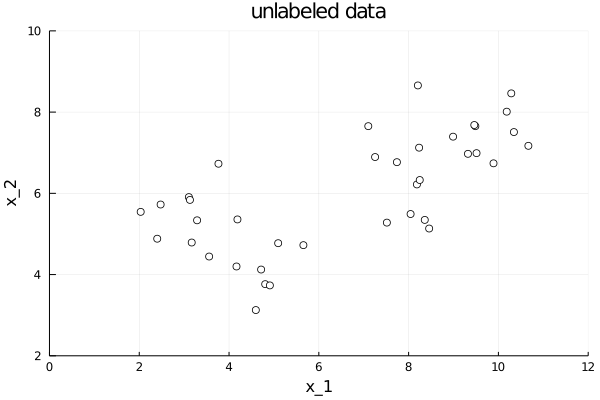

In [18]:
# artifically creating clusters
# with radius r
function circleshape(h, k, r)
    O = LinRange(0, 2*π, 500)
    return h.+r*sin.(O), k.+r*cos.(O)
end

# Assume the center cluster1 is (4,5)
cluster1 = [(4 + (-1)^rand(1:2)*rand(1:2)*rand(), 5 + (-1)^rand(1:2)*rand(1:2)*rand())
for _ = 1:17]
# Assume the center cluster2 is (9,7)
cluster2 = [(9 + (-1)^rand(1:2)*rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:2)*rand())
for _ = 1:21]

# make the full data set of unlabeled points
data = copy(cluster1)
for x in cluster2
    push!(data, x)
end

# plot the data
plot(legend = false,
xlabel = "x_1",
xlim = (0,12),
ylabel = "x_2",
ylim = (2,10),
title = "unlabeled data"
)

scatter!(data, color = "white")

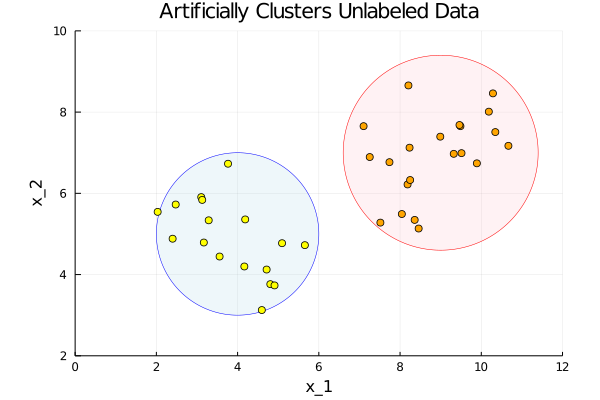

In [23]:
# Plotting the data
plot(legend = false,
xlabel = "x_1",
xlim = (0,12),
ylabel = "x_2",
ylim = (2,10),
title = "Artificially Clusters Unlabeled Data")

plot!(circleshape(4, 5, 2.0),
seriestype = [:shape, ],
lw = 0.5,
c = "lightblue",
linecolor = "blue",
legend = false,
fillalpha = 0.2,
aspect_ratio = 1,)

plot!(circleshape(9, 7, 2.4),
seriestype = [:shape, ],
lw = 0.5,
c = "pink",
linecolor = "red",
legend = false,
fillalpha = 0.2,
aspect_ratio = 1,)

scatter!(cluster1, color = "yellow",
legend = false)
scatter!(cluster2, color = "orange",
legend = false)

## 2.3. Algorithm in Action

### 1. Calculate the Euclidean distance from each feature vector to each centroid.

Now we run a clustering algorithm on this generated unlabeled data. 

In order to implement k means we some metric to determine distance. In this notebook, we're going to use the **standard euclidean distance**.

$$d(p, q) = \sqrt{\sum_{i=1}^{n}(q_{i}-p_{j})^{2}}$$

In [56]:
# standard euclidean distance
function distance(p1,p2)
    return sqrt(sum((p1[i] - p2[i])^2 for i = 1:length(p1)))
end

distance (generic function with 1 method)

We need to calculate the distances from the points in our training vector to our centroids, and we have to choose how many centroids there are. 

In [57]:
# a dictionary of dictionaries
function k_means_distances(X, centroids, k)
    # an empty dictionary
    distances = Dict() 
    # for each point in my collection of feature vectors, 
    for p in X  
        temp_dict = Dict() 
        # the number of centroids
        for i = 1:k
            # the temp dict with centroid i, is equal to 
            # the euclidean distance between my point in X & the centroid i
            temp_dict[i] = distance(p, centroids[i])
        end
        # the distance dictionary with point p as the key,
        # is equal to the temp dict
        distances[p] = temp_dict
    end
    return distances
end;

### 2. Assign to each feature vector the centroid that is closest.

In [58]:
# Take in my data set, centroids, and value for k
function k_means_clusters(X, centroids, k)
    distances = k_means_distances(X, centroids, k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_d = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_d
                clusters[p] = i
                min_d = distances[p][i]
            end
        end
    end
    return clusters
end;
                

### 3. We next update the centroids in $C$ by the following equation:

${C_j}^{i}$ = $\frac{1} {|S_{i}|}$ $\underset{x \epsilon S_{i}}{\sum} Xj$ $\Longrightarrow$ The mean along the $j^{th}$ dimension for cluster $i$

In [59]:
function k_means_new_centroids(X, centroids, k)
    clusters = k_means_clusters(X, centroids, k)
    new_centers = []
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x, y)
        push!(new_centers, point)
    end
    return new_centers
end;
    

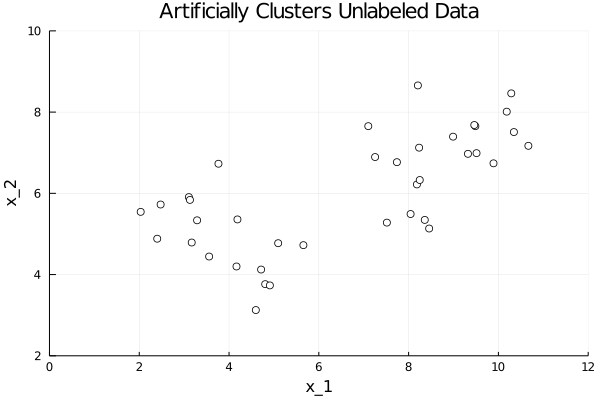

In [60]:
# Plotting the data
plot(legend = false,
xlabel = "x_1",
xlim = (0,12),
ylabel = "x_2",
ylim = (2,10),
title = "Artificially Clusters Unlabeled Data")

scatter!(cluster1, color = "white",
legend = false)
scatter!(cluster2, color = "white",
legend = false)

Now I will initialize some random centroids ,and make k=2.


[(10, 3), (10, 7)]


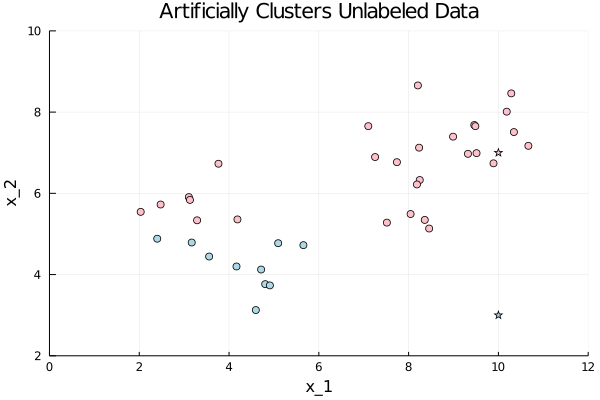

In [63]:
# Function Test (k=2)
initial_centroids = [(rand(1:10), rand(1:10)), (rand(1:10), rand(1:10))]
println(initial_centroids)

clusters = k_means_clusters(data, initial_centroids, 2)

plot(legend = false,
xlabel = "x_1",
xlim = (0,12),
ylabel = "x_2",
ylim = (2,10),
title = "Artificially Clusters Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1],
color = "lightblue",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2],
color = "pink",
legend = false)

scatter!([initial_centroids[1]], color = "lightblue", shape = :star5)
scatter!([initial_centroids[2]], color = "pink", shape = :star5)

So the star is my initial random centroid. Group 1 is lightblue and group 2 is pink. The points are colored light blue if they're closest to point 1 and they're colored pink if they're closest to point 2.

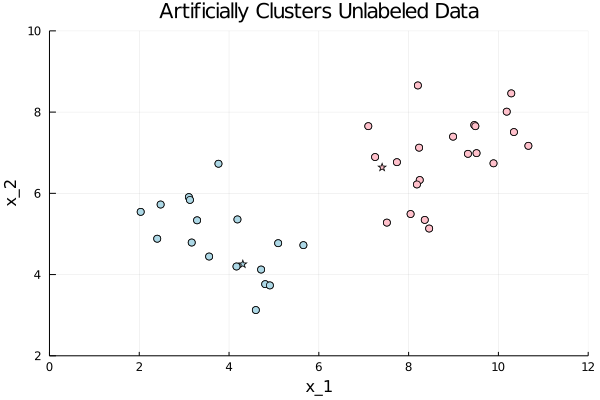

In [64]:
centroids_test = k_means_new_centroids(data, initial_centroids, 2)
# find my new clusters with my updated centroids
clusters = k_means_clusters(data, centroids_test, 2)

plot(legend = false,
xlabel = "x_1",
xlim = (0,12),
ylabel = "x_2",
ylim = (2,10),
title = "Artificially Clusters Unlabeled Data")
scatter!(cluster1, color = "white",legend = false)
scatter!(cluster2, color = "white",legend = false)

scatter!([x for x in keys(clusters) if clusters[x] == 1],
color = "lightblue",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2],
color = "pink",
legend = false)
scatter!([centroids_test[1]], color = "lightblue", shape = :star5)
scatter!([centroids_test[2]], color = "pink", shape = :star5)

we see that after 1 iteration of this, that we've clustered our artificial data. Let's see what happens if we run this again.

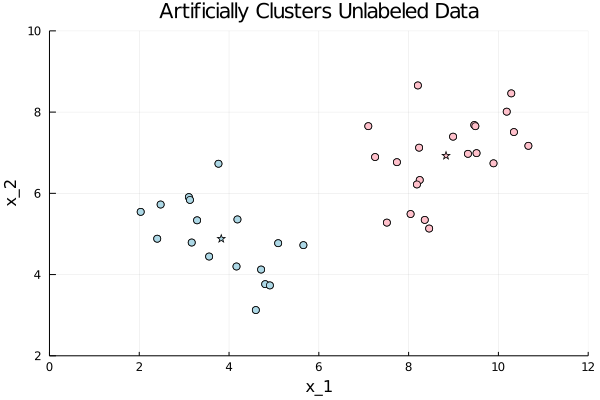

In [65]:
centroids_test = k_means_new_centroids(data, centroids_test, 2)
# find my new clusters with my updated centroids
clusters = k_means_clusters(data, centroids_test, 2)

plot(legend = false,
xlabel = "x_1",
xlim = (0,12),
ylabel = "x_2",
ylim = (2,10),
title = "Artificially Clusters Unlabeled Data")
scatter!(cluster1, color = "white",legend = false)
scatter!(cluster2, color = "white",legend = false)

scatter!([x for x in keys(clusters) if clusters[x] == 1],
color = "lightblue",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2],
color = "pink",
legend = false)
scatter!([centroids_test[1]], color = "lightblue", shape = :star5)
scatter!([centroids_test[2]], color = "pink", shape = :star5)

Our centroids moved since our last iteration. The centroids are always going to be at the mean of the points in that cluster. Lets see what happens when I try to cluster this with  three random centroids at the start, k=3.

[(7, 3), (6, 10), (1, 2)]


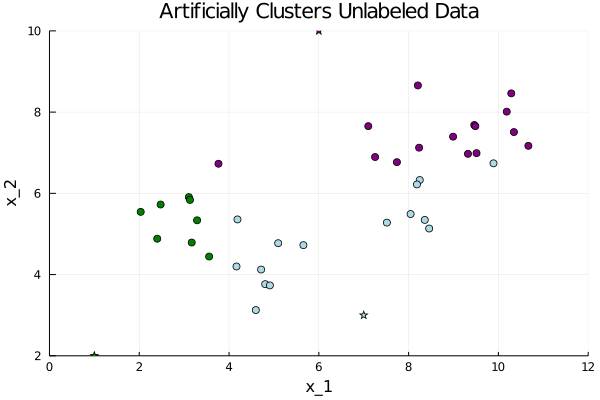

In [66]:
# Function Test (k=3)
initial_centroids = [(rand(1:10), rand(1:10)), (rand(1:10), rand(1:10)), (rand(1:10), rand(1:10))]
println(initial_centroids)

clusters = k_means_clusters(data, initial_centroids, 3)

plot(legend = false,
xlabel = "x_1",
xlim = (0,12),
ylabel = "x_2",
ylim = (2,10),
title = "Artificially Clusters Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1],
color = "lightblue",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2],
color = "purple",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 3],
color = "green",
legend = false)

scatter!([initial_centroids[1]], color = "lightblue", shape = :star5)
scatter!([initial_centroids[2]], color = "purple", shape = :star5)
scatter!([initial_centroids[3]], color = "green", shape = :star5)

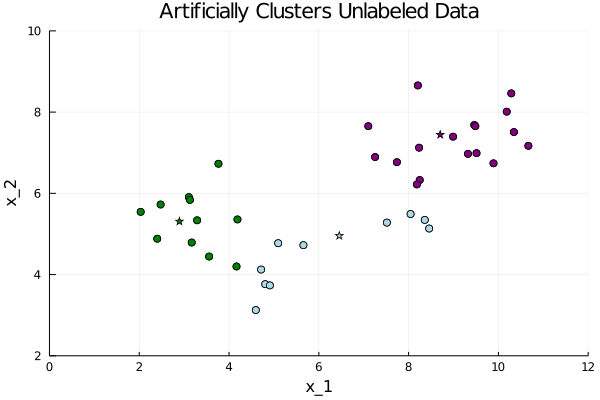

In [67]:
centroids_test = k_means_new_centroids(data, initial_centroids, 3)
# find my new clusters with my updated centroids
clusters = k_means_clusters(data, centroids_test, 3)

plot(legend = false,
xlabel = "x_1",
xlim = (0,12),
ylabel = "x_2",
ylim = (2,10),
title = "Artificially Clusters Unlabeled Data")
scatter!(cluster1, color = "white",legend = false)
scatter!(cluster2, color = "white",legend = false)

scatter!([x for x in keys(clusters) if clusters[x] == 1],
color = "lightblue",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2],
color = "purple",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 3],
color = "green",
legend = false)
scatter!([centroids_test[1]], color = "lightblue", shape = :star5)
scatter!([centroids_test[2]], color = "purple", shape = :star5)
scatter!([centroids_test[3]], color = "green", shape = :star5)

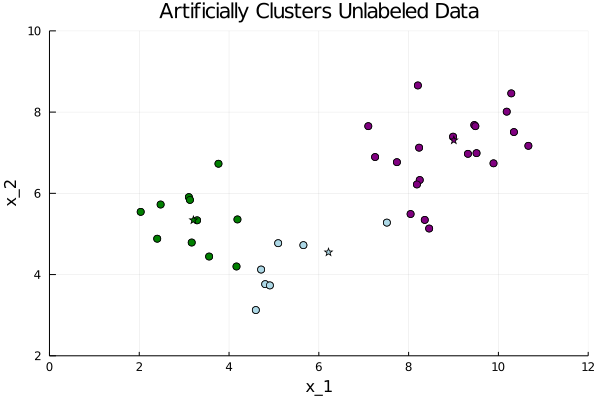

In [68]:
centroids_test = k_means_new_centroids(data, centroids_test, 3)
# find my new clusters with my updated centroids
clusters = k_means_clusters(data, centroids_test, 3)

plot(legend = false,
xlabel = "x_1",
xlim = (0,12),
ylabel = "x_2",
ylim = (2,10),
title = "Artificially Clusters Unlabeled Data")
scatter!(cluster1, color = "white",legend = false)
scatter!(cluster2, color = "white",legend = false)

scatter!([x for x in keys(clusters) if clusters[x] == 1],
color = "lightblue",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2],
color = "purple",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 3],
color = "green",
legend = false)
scatter!([centroids_test[1]], color = "lightblue", shape = :star5)
scatter!([centroids_test[2]], color = "purple", shape = :star5)
scatter!([centroids_test[3]], color = "green", shape = :star5)

### 4. Repeat steps 1 - 3 until convergence.

Convergence means that :
+  my centroids dont change very much.
+ the maximum of iterations have been reached 
+ the points stay in the same group

So the stopping criteria that i have choosen here is that my centroids dont change after each iteration.

In [71]:
function k_means_algorithm(X, k, e; return_centroids = false)
    
    centroids = []
    for _ = 1:k
        i = rand(1:length(X))
        j = rand(1:length(X))/length(X)
        push!(centroids, (X[i][1] + j, X[i][2] - j))
    end
    
    # k-means algorithm
    # calculating ne centroids
    new_centroids = k_means_new_centroids(X, centroids, k)
    j = 1
    # while the max dist from centroids to the new centroids, while that is greater than e
    # and my counter hasn't gotten too big
    while maximum([distance(centroids[i], new_centroids[i]) for i = 1:k]) > e && j < 10000000
        # my new centroids i calculate using this
        centroids, new_centroids = new_centroids, k_means_new_centroids(X, new_centroids, k)
        # increment my j
        j += 1
    end
    # if/else statement is with the optinal arguement, if that's false it returns the clusters
    # if true return the new centroids
    if return_centroids == false
        return k_means_clusters(X, new_centroids, k)
    else
        return new_centroids
    end
end;

In [72]:
# testing
k_means_algorithm(data, 2, 0.0001)

Dict{Any,Any} with 38 entries:
  (3.76441, 6.72867) => 2
  (2.47599, 5.72438) => 2
  (9.46321, 7.68199) => 1
  (4.16615, 4.19881) => 2
  (9.89114, 6.73875) => 1
  (4.80573, 3.76382) => 2
  (3.55676, 4.44398) => 2
  (10.3454, 7.50826) => 1
  (8.04402, 5.49048) => 1
  (8.35984, 5.34551) => 1
  (5.09438, 4.77232) => 2
  (9.4866, 7.65312)  => 1
  (3.10513, 5.90674) => 2
  (4.90949, 3.73296) => 2
  (2.03193, 5.54377) => 2
  (5.65632, 4.7241)  => 2
  (3.12913, 5.83803) => 2
  (10.1854, 8.01062) => 1
  (9.32181, 6.97255) => 1
  (7.25346, 6.89352) => 1
  (8.23391, 7.12404) => 1
  (8.45767, 5.13344) => 1
  (8.9904, 7.39511)  => 1
  (8.24785, 6.32763) => 1
  (8.20615, 8.65636) => 1
  ⋮                  => ⋮

In [73]:
# testing
# If I want to look at the centroids. 
# 
k_means_algorithm(data, 2, 0.0001, return_centroids = true)

2-element Array{Any,1}:
 (8.833147475815771, 6.927130393029172)
 (3.826546273228499, 4.881888057766655)

So then we can use that to make predictions on our clusters by just getting the centroids and the clusters.


In [75]:
function predict(point, X, k, e)
    centroids = k_means_algorithm(X, k, e, return_centroids = true)
    clusters = k_means_algorithm(X, k, e)
    print("Predicted class of point ", string(point), " is ")
    println("Class ", string(clusters[point]))
end;

In [77]:
predict(data[1], data, 2, 0.1)

Predicted class of point (4.805729662090833, 3.7638200334572107) is Class 2


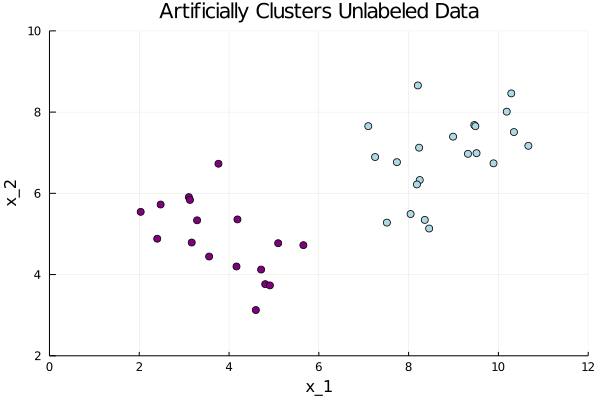

In [78]:
clusters = k_means_algorithm(data, 2, 0.001)

plot(legend = false,
xlabel = "x_1",
xlim = (0,12),
ylabel = "x_2",
ylim = (2,10),
title = "Artificially Clusters Unlabeled Data")


scatter!([x for x in keys(clusters) if clusters[x] == 1],
color = "lightblue",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2],
color = "purple",
legend = false)

Lets try now with an artifical data set of 3 clusters.

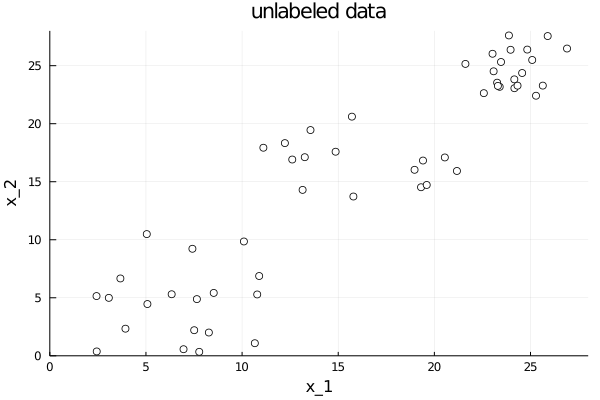

In [80]:
# Artificial data containing 3 clusters
# Assume the center cluster1 is (5, 10)
cluster1 = [(rand(1:10) + (-1)^rand(1:2)*rand(1:2)*rand(), rand(1:10) + (-1)^rand(1:2)*rand(1:1.5)*rand())
for _ = 1:19]
# Assume the center cluster2 is (10, 12)
cluster2 = [(rand(12:20) + (-1)^rand(1:2)*rand(1:2)*rand(), rand(12:20) + (-1)^rand(1:2)*rand(1:1.5)*rand())
for _ = 1:15]
# Assume the center cluster1 is (20, 22)
cluster3 = [(rand(23:27) + (-1)^rand(1:2)*rand(1:2)*rand(), rand(23:27) + (-1)^rand(1:2)*rand(1:1.5)*rand())
for _ = 1:21]

# make the full data set of unlabeled points
data_new = copy(cluster1)
for x in cluster2
    push!(data_new, x)
end
for x in cluster3
    push!(data_new, x)
end



# plot the data
plot(legend = false,
xlabel = "x_1",
xlim = (0,28),
ylabel = "x_2",
ylim = (0,28),
title = "unlabeled data"
)

scatter!(data_new, color = "white")




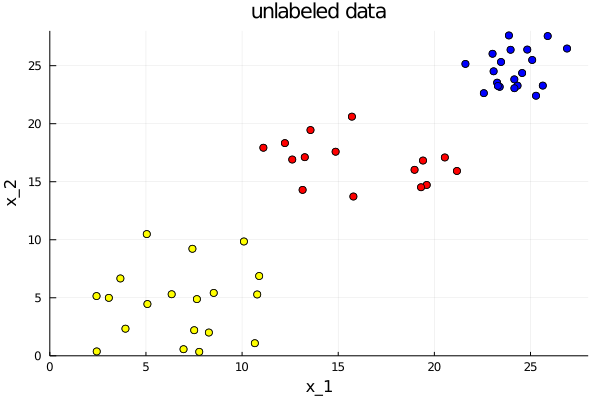

In [81]:
clusters = k_means_algorithm(data_new, 3, 0.0001)

scatter!([x for x in keys(clusters) if clusters[x] == 1],
color = "red",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2],
color = "yellow",
legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 3],
color = "blue",
legend = false)

# 3. Conclusion

In conclusion $K-means$ is a fairly simple clustering algorithm. We were able to disect the algorithm and implement it by scracth step by step. While $K-means$ is a simple algorithm, one of the challenges we may face when working with $K-means$ is finding the best number of clusters to use in the algorithm.
    The choosing of $k$ is often the most common doubts when working with $K-means$. The optimal number of $k$ can chosen using the [elbow method](https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/), where you can plot a graph where the x-axis is the number of clusters and the y-axis is the inertia for that model. Start with a small cluster value,  train and calculate the inertia of the model using the value as $k$, and finally plot it on the graph. Increase the number of clusters and train the model again and plot the inertia value for several different clusters. What you'll notice is that as you increase the number of clusters the the inertia value will decrease and soon be constant. The cluster value where the least amount of change in decrease in inertia value can be chosen as the optimal $k$ value.
